## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。


In [5]:
with open("hw4_data.json","r") as f:
    data=eval(f.read())
# 邻接矩阵
vexs=[i[0] for i in data['nodes']]
w_v=[i[1] for i in data['nodes']]
arcs=[[0 for i in range(len(vexs))] for i in range(len(vexs))]
for i in data['edges']:
    arcs[vexs.index(i[0])][vexs.index(i[1])]=i[2]
    arcs[vexs.index(i[1])][vexs.index(i[0])]=i[2]
for i in range(len(vexs)):
    frd=[vexs[j] for j in range(len(vexs)) if arcs[i][j]!=0]
    print("%15s\'s friends:"%vexs[i],frd)




    Yanyan-Wang's friends: ['Aarebecca', 'pomelo-nwu', 'tyn1998', 'frank-zsy', 'andyhuang18', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923']
      Aarebecca's friends: ['Yanyan-Wang', 'pomelo-nwu', 'tyn1998', 'frank-zsy', 'yangzy0603', 'lidongze0629', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923']
     pomelo-nwu's friends: ['Yanyan-Wang', 'Aarebecca', 'tyn1998', 'frank-zsy', 'will-ww', 'zhicheng-ning', 'xgdyp', 'andyhuang18', 'Zzzzzhuzhiwei', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'PureNatural', 'birdflyi', 'lhbvvvvv', 'xiaoya-yaya', 'yikenie', 'RackweLLizm', 'Maple0817', 'yvonneyx', 'yubo0923', 'zhaosj975', 'longyanz']
        tyn1998's friends: ['Yanyan-Wang', 'Aarebecca', 'pomelo-nwu', 'frank-zsy', 'will-ww', 'zhicheng-ning', 'xgdyp', 'stevending1st', 'andyhuang18', 'Zzzzzhuzhiwei', 'wxharry', 'bifenglin', 'yangzy0603', 'lidongze0629', 'wj23027', 'PureNatural', 'kunal8411', 'birdfly


#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。


In [57]:
arr=[[vexs[i],len(vexs)-arcs[i].count(0)] for i in range(len(vexs))]
brr=[[vexs[i],w_v[i]] for i in range(len(vexs))]
crr=[[vexs[i],arr[i][1]/2+brr[i][1]/2] for i in range(len(vexs))]
arr.sort(key=lambda i:i[1],reverse=True)
brr.sort(key=lambda i:i[1],reverse=True)
crr.sort(key=lambda i:i[1],reverse=True)
print("度数最多的前5个:",arr[:5])
print("影响力最高的前5个:",brr[:5])
print("综合得分(50%朋友数量和50%影响力)最高的前5个:",crr[:5])

度数最多的前5个: [['tyn1998', 30], ['frank-zsy', 30], ['pomelo-nwu', 24], ['andyhuang18', 23], ['wj23027', 23]]
影响力最高的前5个: [['Yanyan-Wang', 50.95], ['Aarebecca', 23.82], ['pomelo-nwu', 22.36], ['tyn1998', 16.64], ['frank-zsy', 15.8]]
综合得分(50%朋友数量和50%影响力)最高的前5个: [['Yanyan-Wang', 32.475], ['tyn1998', 23.32], ['pomelo-nwu', 23.18], ['frank-zsy', 22.9], ['Aarebecca', 17.41]]



#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。


In [58]:
# 最多共同的朋友推荐
def newfriend_recomend(str):
    a=vexs.index(str)
    newfriends=[[i,0] for i in range(len(vexs)) if arcs[a][i]==0 and i!=a]
    for i in range(len(vexs)):
        if arcs[a][i]==0:
            continue
        for j in newfriends:
            if arcs[i][j[0]]!=0:
                j[1]+=1
    newfriends.sort(key=lambda i:i[1],reverse=True)
    return vexs[newfriends[0][0]]

print("Yanyan-Wang的推荐朋友(最多共同的朋友):",newfriend_recomend('Yanyan-Wang'))
arr=[[vexs[i],arcs[vexs.index('Yanyan-Wang')][i]] for i in range(len(vexs)) if i!=vexs.index('Yanyan-Wang')]
arr.sort(key=lambda i:i[1],reverse=True)
print("Yanyan-Wang 连接强度最高的5个用户",arr[:5])

Yanyan-Wang的推荐朋友(最多共同的朋友): will-ww
Yanyan-Wang 连接强度最高的5个用户 [['Aarebecca', 25.3], ['pomelo-nwu', 25.09], ['yangzy0603', 11.85], ['tyn1998', 9.62], ['yvonneyx', 7.39]]


#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

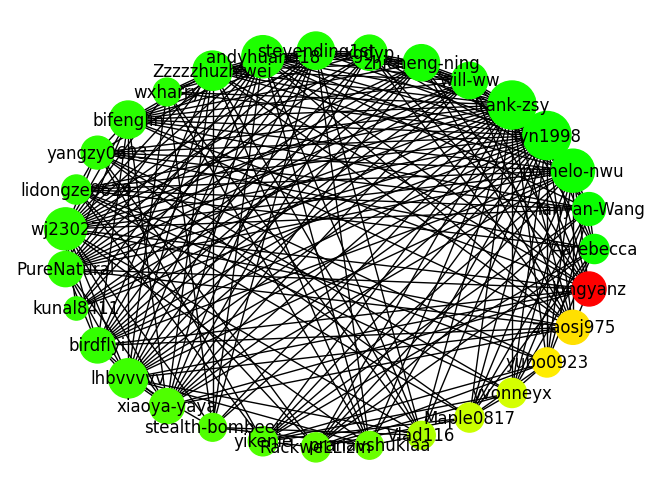

In [94]:
import networkx as nx
G=nx.Graph([(vexs[i],vexs[j]) for i in range(len(vexs)) for j in range(i) if arcs[i][j]!=0])

def w2color(x):
    range=20
    if 0<=x<=range:
        x=(int(x/range*256)<<16)+0xff00
    else:
        x=0xffff00-(int((x-range)/(51-range)*256)<<8)
    return "#%06x"%x

for i in range(len(vexs)):
    G.nodes[vexs[i]]['color']=w2color(w_v[i])

list,degree=zip(*G.degree)
nx.draw(G,pos=nx.circular_layout(G),with_labels=True,nodelist=list,node_size=[i*40 for i in degree],node_color=nx.get_node_attributes(G,'color').values())
